In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_rows = 100
n_cols = 10

In [93]:
def generate_data(n_cols, n_rows=100, epsilon=1e-4):
    a = np.zeros((n_rows, n_cols))
    target = np.zeros((1,n_cols))
    for i in range(n_cols):
        if np.random.binomial(1,0.5):
            n_cat = np.random.randint(1, n_rows)
            a[:,i] = np.random.choice(range(n_cat), size=n_rows)
            a[:,i] /= np.std(a[:,i])+epsilon
            a[:,i] -= np.mean(a[:,i])
            target[0,i] = 0.
            if np.random.binomial(1,0.5):
                n_cat = np.random.randint(1, 20)
                a[:,i] = np.random.choice(range(n_cat), size=n_rows)
                a[:,i] /= np.std(a[:,i])+epsilon
                a[:,i] -= np.mean(a[:,i])
                target[0,i] = 1.
        else:
            a[:,i] = np.random.standard_normal(n_rows)
            target[0,i] = 0.
    return a, target

In [94]:
a, target = generate_data(50)

### Assess cat variable with number of unique variables

In [21]:
nb_unique_vals = [len(np.unique(a[:,i])) for i in range(n_cols)]
nb_unique_vals

[61, 100, 9, 48, 60, 6, 53, 100, 4, 100]

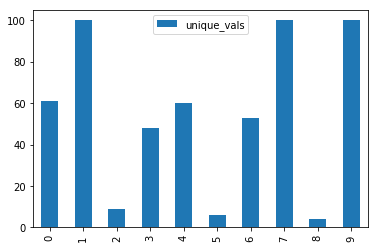

In [24]:
pd.DataFrame({'unique_vals':nb_unique_vals}).plot(kind='bar')
plt.show()

In [6]:
iris = pd.read_csv('../data/iris.csv')

In [8]:
nb_unique_vals = [len(np.unique(iris.iloc[:,i])) for i in range(len(iris.columns))]
nb_unique_vals

[35, 23, 43, 22, 3]

In [10]:
np.std(nb_unique_vals[:-1])

8.728545125048045

### Assess cat variable with number of values per categories

In [306]:
def data_features(a, target):
    mean_vals = []
    std_vals = []
    min_vals = []
    max_vals = []
    nb_unique_vals = []
    for i in range(a.shape[1]):
        nb_unique_vals.append(len(np.unique(a[:,i])))
        vals = np.unique(a[:,i])
        vals_dict = {x: np.sum(a[:,i] == x) for x in vals}
        mean_vals.append(np.mean(list(vals_dict.values())))
        std_vals.append(np.std(list(vals_dict.values())))
        min_vals.append(np.min(list(vals_dict.values())))
        max_vals.append(np.max(list(vals_dict.values())))
    return pd.DataFrame({'count_cat': nb_unique_vals, 
                         'mean_count_cat': mean_vals, 
                         'std_count_cat': std_vals,
                         'min_count-cat': min_vals,
                         'max_count_cat': max_vals,
                         'target': target[0].tolist()})

In [64]:
target = [0,0,1,0,0,1,0,0,1,0]

In [65]:
df = pd.DataFrame({'count_cat': nb_unique_vals, 'mean_count_cat': mean_vals, 'std_count_cat': std_vals, 'target': target})

In [66]:
df

,count_cat,mean_count_cat,std_count_cat,target
0,61,1.639344,1.116681,0
1,100,1.000000,0.000000,0
2,9,11.111111,2.330686,1
3,48,2.083333,1.221907,0
4,60,1.666667,0.809664,0
5,6,16.666667,3.726780,1
6,53,1.886792,0.964666,0
7,100,1.000000,0.000000,0
8,4,25.000000,4.743416,1
9,100,1.000000,0.000000,0


In [95]:
df = data_features(a, target)

In [96]:
df

,count_cat,mean_count_cat,std_count_cat,target
0,100,1.000000,0.000000,0.0
1,100,1.000000,0.000000,0.0
2,100,1.000000,0.000000,0.0
3,100,1.000000,0.000000,0.0
4,57,1.754386,0.923014,0.0
5,100,1.000000,0.000000,0.0
6,9,11.111111,2.643417,1.0
7,18,5.555556,2.753225,1.0
8,100,1.000000,0.000000,0.0
9,100,1.000000,0.000000,0.0


In [105]:
df.iloc[:, df.columns != 'target']

,count_cat,mean_count_cat,std_count_cat
0,100,1.000000,0.000000
1,100,1.000000,0.000000
2,100,1.000000,0.000000
3,100,1.000000,0.000000
4,57,1.754386,0.923014
5,100,1.000000,0.000000
6,9,11.111111,2.643417
7,18,5.555556,2.753225
8,100,1.000000,0.000000
9,100,1.000000,0.000000


In [117]:
target = np.array([[0.,0.,0.,0.,1.]])
iris_features = data_features(iris.values, target)

In [118]:
iris_features

,count_cat,mean_count_cat,std_count_cat,target
0,35,4.285714,2.710524,0.0
1,23,6.521739,5.859734,0.0
2,43,3.488372,2.856018,0.0
3,22,6.818182,5.677999,0.0
4,3,50.000000,0.000000,1.0


### ML model

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [106]:
lr = LogisticRegression()


In [107]:
lr.fit(df.iloc[:, df.columns != 'target'].values, df.target.values)

I:\Data_repr\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [110]:
accuracy_score(df.target.values, lr.predict(df.iloc[:, df.columns != 'target'].values))

0.94

In [119]:
accuracy_score(iris_features.target, lr.predict(iris_features.iloc[:, iris_features.columns != 'target'].values))

0.6

In [120]:
lr.predict(iris_features.iloc[:, iris_features.columns != 'target'].values)

array([0., 1., 0., 1., 1.])

## Dataset

In [169]:
filenames = ['abalone', 'annealing','auto_mpg','credit_screening','thyroid', 'automobile']

In [307]:
for i, filename in enumerate(filenames):
    print(filename)
    data = pd.read_csv('../data/'+filename+'.csv', header=None)
    target = pd.read_csv('../data/'+filename+'.target', header=None)
    if i == 0:
        df = data_features(data.values, target.values.T)
    else:
        df = pd.concat([df, data_features(data.values, target.values.T)])

abalone
annealing
auto_mpg
credit_screening
thyroid
automobile


In [308]:
df.describe()

,count_cat,mean_count_cat,std_count_cat,min_count-cat,max_count_cat,target
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,86.077519,901.044692,772.097221,157.100775,1876.434109,0.635659
std,278.526301,1624.364492,1470.542839,349.222481,3157.438892,0.483121
min,1.000000,1.096257,0.000000,0.000000,4.000000,0.000000
25%,2.000000,16.285714,7.295328,1.000000,94.000000,0.000000
50%,4.000000,149.178571,82.410127,3.000000,495.000000,1.000000
75%,49.000000,399.000000,354.000000,116.000000,798.000000,1.000000
max,2429.000000,4586.000000,4584.000000,2604.000000,9170.000000,1.000000


In [309]:
df.index = df.index.reindex(list(range(len(df))))[0]

In [332]:
idx = df.sample(25).index
df.iloc[idx,:].target.mean()

0.68

In [333]:
test_cond = df.index.isin(idx)
test = df[test_cond].copy()
train = df[~test_cond].copy()

In [356]:
lr = LogisticRegression()
lr.fit(train.iloc[:, df.columns != 'target'].values, train.target.values)
accuracy_score(train.target.values, lr.predict(train.iloc[:, train.columns != 'target'].values))

I:\Data_repr\venv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9423076923076923

In [357]:
accuracy_score(test.target, lr.predict(test.iloc[:, test.columns != 'target'].values))

0.92

In [338]:
from sklearn.neural_network import MLPClassifier

In [339]:
model = MLPClassifier()

In [354]:
model.fit(train.iloc[:, train.columns != 'target'].values, train.target.values)
accuracy_score(train.target.values, model.predict(train.iloc[:, train.columns != 'target'].values))

0.9423076923076923

In [355]:
accuracy_score(test.target, model.predict(test.iloc[:, test.columns != 'target'].values))

0.96

In [362]:
np.std([0,0,0,1])

0.4330127018922193

In [360]:
np.std([1,2,3,4])

1.118033988749895

In [364]:
round(len(pd.DataFrame({'val':[0,0,0,0,0,0,0,0,0,0]}))*0.2)

2